## Data Visualization

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv",sep=",") #relative path

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


*matplotlib* is a  plotting package designed for creating (mostly two dimensional)
publication-quality plots.

In [4]:
import matplotlib.pyplot as plt

In [5]:
# How to find the number of passengers for each gender?
# SELECT Sex, COUNT(PassengerId)
# FROM df
# GROUP BY Sex
#

df.groupby("Sex")["PassengerId"].count()

Sex
female    152
male      266
Name: PassengerId, dtype: int64

In [6]:
sex=df["Sex"].value_counts()

In [7]:
sex

male      266
female    152
Name: Sex, dtype: int64

Use <code>pie</code> to plot a pie chart. 

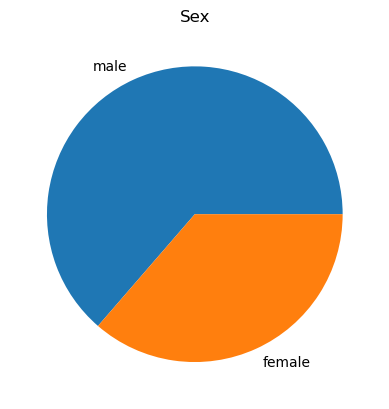

In [8]:
plt.pie(sex.values, labels=sex.index)
plt.title("Sex")

plt.savefig("Sex.jpg")

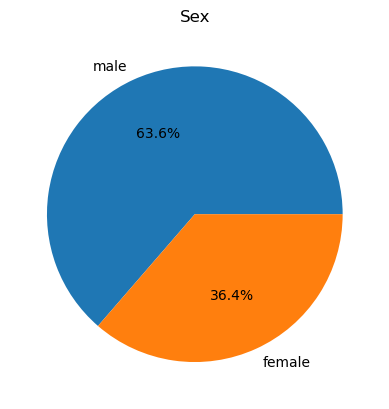

In [16]:
#autopct enables you to display the percent value using Python string formatting. 
plt.pie(sex.values, labels=sex.index, autopct='%.1f%%')
plt.title("Sex")
plt.savefig("sex.pdf",dpi=300)

A **histogram** is a kind of bar plot that gives a discretized display of value frequency. The data points are plit into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

In [10]:
df["Age"].max()

76.0

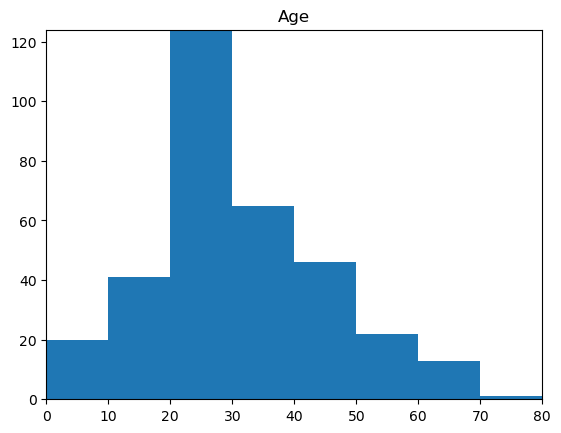

In [17]:
# histogram
plt.hist(df["Age"], bins=range(0, 90, 10))
plt.margins(x=0, y=0) 
plt.title("Age")
plt.savefig("age.pdf")

In [12]:
#df.loc[:,"Age"]
# Display the age column of all female passengers
df.loc[df["Sex"]=="female","Age"]


1      47.0
4      22.0
6      30.0
8      18.0
12     23.0
       ... 
409     3.0
410     NaN
411    37.0
412    28.0
414    39.0
Name: Age, Length: 152, dtype: float64

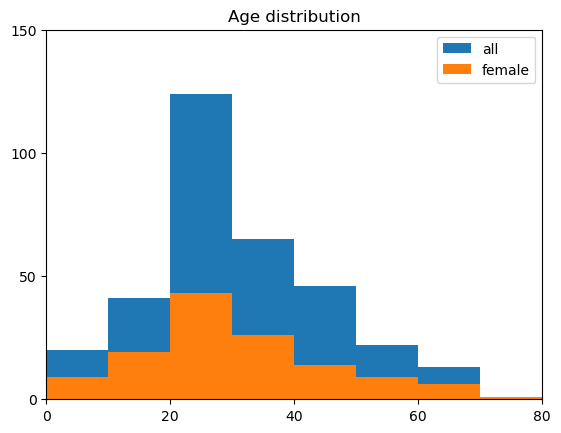

In [13]:
plt.hist(df["Age"],bins=range(0,90,10) )
plt.hist(df.loc[df["Sex"]=="female", "Age"], bins=range(0,90,10))
plt.title("Age distribution")
plt.margins(x=0,y=0)
plt.ylim([0,150])
plt.yticks(range(0,160,50))
plt.xticks(range(0,100,20))
#plt.xlim([0,80])
plt.legend(["all","female"],loc="upper right")

#plt.savefig("age.jpg")

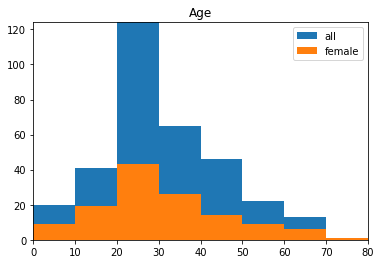

In [35]:
df["Age"].hist(bins=range(0,80,10),label="all")
df[df["Sex"]=="female"]["Age"].hist(bins=range(0,85,10), label="female")
plt.margins(x=0, y=0)
plt.legend()
plt.title("Age")

plt.grid(None) 

*seaborn* is a Python data visualization library based on *matplotlib*. 

In [59]:
import seaborn as sns

**Scatterplots** can be a useful way of examining the relationship between two one-dimensional dataseries. 

Text(0.5, 1, 'Age vs Fare by Sex')

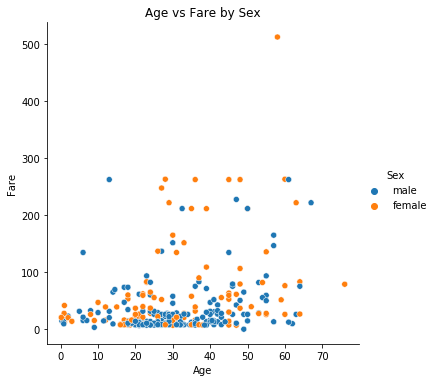

In [64]:
sns.relplot(x="Age", y="Fare", data=df, hue="Sex")

#plt.margins(x=0)

plt.title("Age vs Fare by Sex")

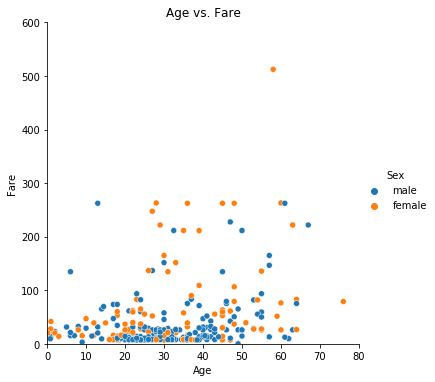

In [66]:
g=sns.relplot(x="Age", y="Fare", data=df, hue="Sex")
g.set(title="Age vs. Fare", xlim=[0,80], ylim=[0,600])

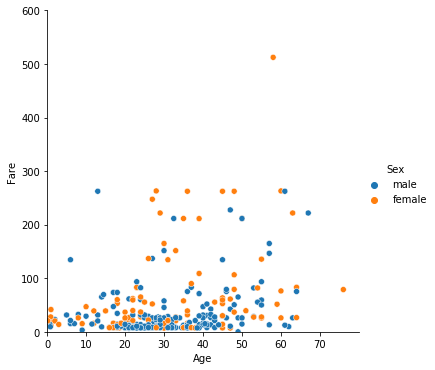

In [58]:
#relplot scatterplot
g=sns.relplot(x="Age",y="Fare", data=df, hue="Sex")
g.set(xlim=[0,80], ylim=[0,600],xticks=range(0,80,10),yticks=range(0,700,100))

#plt.savefig("age_v_fare.pdf")

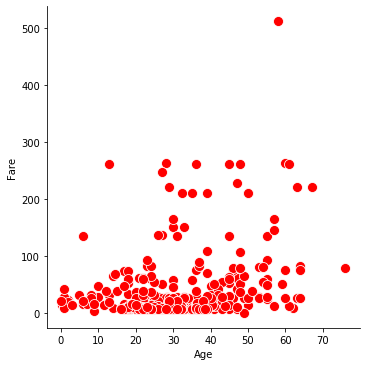

In [98]:
sns.relplot(x=df["Age"], y=df["Fare"],color="r",s=100)

[(0, 538.9341480902776), (0, 79.8023422939068), Text(0.5, 1.0, 'Age vs. Fare')]

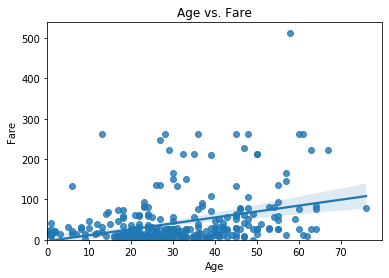

In [70]:
# plot data and a linear regression fit
g=sns.regplot(x="Age",y="Fare", data=df)
g.set(xlim=0, ylim=0, title="Age vs. Fare")

<code>lmplot</code> is intended as a convenient interface to fit regression models across conditional subsets of a dataset.



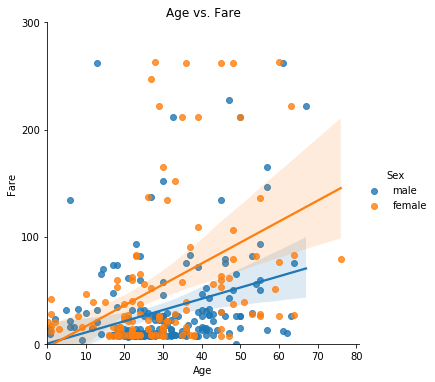

In [76]:
g=sns.lmplot(x="Age",y="Fare",hue="Sex",data=df)
g.set(xlim=0, ylim=[0,300], yticks=range(0,350,100), title="Age vs. Fare")

Histogram with seaborn

[(0, 100)]

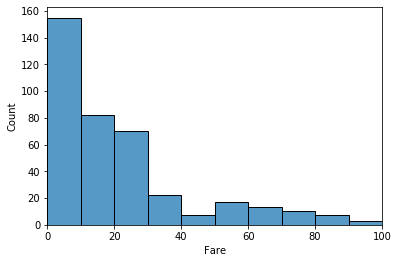

In [82]:
g=sns.histplot(x="Fare", data=df, bins=range(0,110, 10))
g.set(xlim=[0,100])

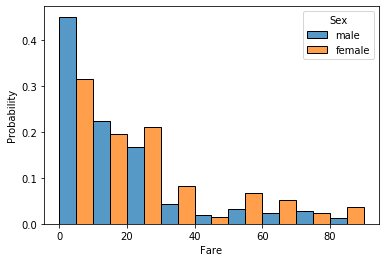

In [87]:
g=sns.histplot(x="Fare", data=df, hue="Sex", bins=range(0,100, 10), multiple="dodge", 
               stat="probability", common_norm=False)

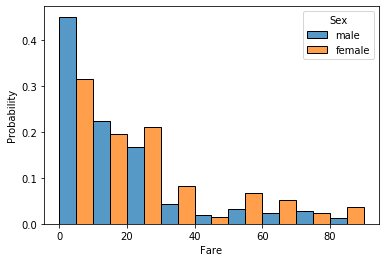

In [53]:
g=sns.histplot(x="Fare", data=df,hue="Sex", bins=range(0,100, 10), 
               multiple="dodge", stat="probability",common_norm=False)

#g.set(xlim=0)

[(0, 100)]

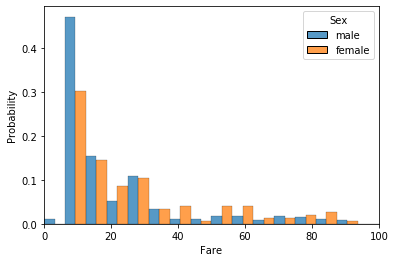

In [59]:
g=sns.histplot(x="Fare", hue="Sex", data=df,multiple="dodge",\
             stat="probability", common_norm=False)
g.set(xlim=[0,100])